In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow

In [2]:
# initialize GPU
cle.select_device("GTX")
print("Used GPU: " + cle.get_device().name)

Used GPU: gfx902


In [3]:
# load data
image = imread('D:/structure/data/blobs.tif')
#imread('https://imagej.nih.gov/ij/images/blobs.gif')
print("Loaded image size: " + str(image.shape))

Loaded image size: (254, 256)


In [4]:
# push image to GPU memory
input = cle.push(image)
print("Image size in GPU: " + str(input.shape))

Image size in GPU: (256, 254)


c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:253: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


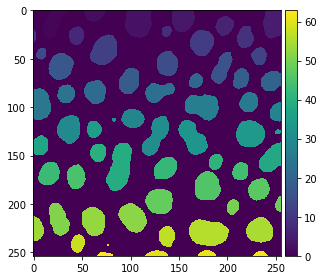

In [5]:
# process the image
blurred = cle.gaussian_blur(input, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)

imshow(cle.pull(labeled))

In [6]:
# The maxmium intensity in a label image corresponds to the number of objects
num_labels = cle.maximum_of_all_pixels(labeled)

# print out result
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 63.0
